In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andrewmvd/ocular-disease-recognition-odir5k

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
100% 1.62G/1.62G [00:51<00:00, 40.5MB/s]
100% 1.62G/1.62G [00:51<00:00, 34.0MB/s]


In [ ]:
!mkdir /content/Dataset
!unzip -q /content/ocular-disease-recognition-odir5k.zip -d /content/Dataset
!rm /content/ocular-disease-recognition-odir5k.zip

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS

In [ ]:
print(os.listdir("/content/Dataset/ODIR-5K/ODIR-5K"))

['data.xlsx', 'Testing Images', 'Training Images']


In [ ]:
data_df = pd.read_excel(open("/content/Dataset/ODIR-5K/ODIR-5K/data.xlsx", 'rb'), sheet_name='Sheet1')  

In [ ]:
data_df.head()

ID  Patient Age Patient Sex Left-Fundus Right-Fundus  \
0   0           69      Female  0_left.jpg  0_right.jpg   
1   1           57        Male  1_left.jpg  1_right.jpg   
2   2           42        Male  2_left.jpg  2_right.jpg   
3   3           66        Male  3_left.jpg  3_right.jpg   
4   4           53        Male  4_left.jpg  4_right.jpg   

                            Left-Diagnostic Keywords  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                Right-Diagnostic Keywords  N  D  G  C  A  H  M  O  
0                           normal fundus  0  0  0  1  0  0  0  0  
1                           normal fundus  1  0  0  0  0  0  0  0  
2  moderate non proliferative retinopathy  0  1  0  0  0  0  0  1  
3         branch retinal artery occlusion  0  0  0  0  0  0  0  1  
4       mild nonproliferative retinopathy  0  1  0  0  0  0  0  1

In [ ]:
data_df.columns = ["id", 'age', "sex", "left_fundus", "right_fundus", "left_diagnosys", "right_diagnosys", "normal",
                  "diabetes", "glaucoma", "cataract", "amd", "hypertension", "myopia", "other"]

In [ ]:
data_df.head()

id  age     sex left_fundus right_fundus  \
0   0   69  Female  0_left.jpg  0_right.jpg   
1   1   57    Male  1_left.jpg  1_right.jpg   
2   2   42    Male  2_left.jpg  2_right.jpg   
3   3   66    Male  3_left.jpg  3_right.jpg   
4   4   53    Male  4_left.jpg  4_right.jpg   

                                      left_diagnosys  \
0                                           cataract   
1                                      normal fundus   
2  laser spot，moderate non proliferative retinopathy   
3                                      normal fundus   
4                        macular epiretinal membrane   

                          right_diagnosys  normal  diabetes  glaucoma  \
0                           normal fundus       0         0         0   
1                           normal fundus       1         0         0   
2  moderate non proliferative retinopathy       0         1         0   
3         branch retinal artery occlusion       0         0         0   
4       mild nonproliferative retinopathy       0         1         0   

   cataract  amd  hypertension  myopia  other  
0         1    0             0       0      0  
1         0    0             0       0      0  
2         0    0             0       0      1  
3         0    0             0       0      1  
4         0    0             0       0      1

In [ ]:
print(f"data shape: {data_df.shape}")
print(f"left fundus: {data_df.left_fundus.nunique()}")
print(f"right fundus: {data_df.right_fundus.nunique()}")

data shape: (3500, 15)
left fundus: 3500
right fundus: 3500


In [ ]:
print(f"train images: {len(os.listdir('//content//Dataset//ODIR-5K//ODIR-5K//Training Images'))}")
print(f"test images: {len(os.listdir('//content//Dataset//ODIR-5K//ODIR-5K//Testing Images'))}")
print(f"train images - left eye: {len(glob.glob('//content//Dataset//ODIR-5K//ODIR-5K//Training Images//*_left.jpg'))}")
print(f"train images - right eye: {len(glob.glob('//content//Dataset//ODIR-5K//ODIR-5K//Training Images//*_right.jpg'))}")
print(f"test images - left eye: {len(glob.glob('//content//Dataset//ODIR-5K//ODIR-5K//Testing Images//*_left.jpg'))}")
print(f"test images - right eye: {len(glob.glob('//content//Dataset//ODIR-5K//ODIR-5K//Testing Images//*_right.jpg'))}")

train images: 7000
test images: 1000
train images - left eye: 3500
train images - right eye: 3500
test images - left eye: 500
test images - right eye: 500


In [ ]:
def plot_count(feature, title, df, size=1, show_all=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if show_all:
        g = sns.countplot(data = df, x=df[feature], palette='Set3')
        g.set_title("{} distribution".format(title))
    else:
        g = sns.countplot(data = df, x=df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
        if(size > 2):
            plt.xticks(rotation=90, size=8)
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,height + 0.2,
                        '{:1.2f}%'.format(100*height/total),
                        ha="center") 
        g.set_title("Number and percentage of {}".format(title))
    plt.show()

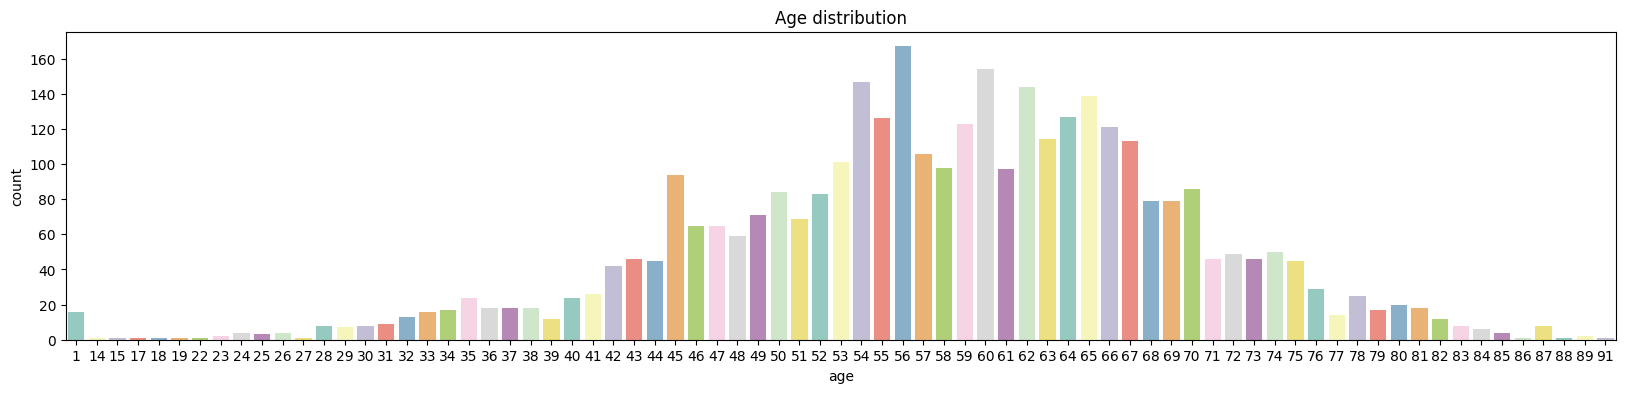

In [ ]:
plot_count("age", "Age", data_df, size=5, show_all=True)

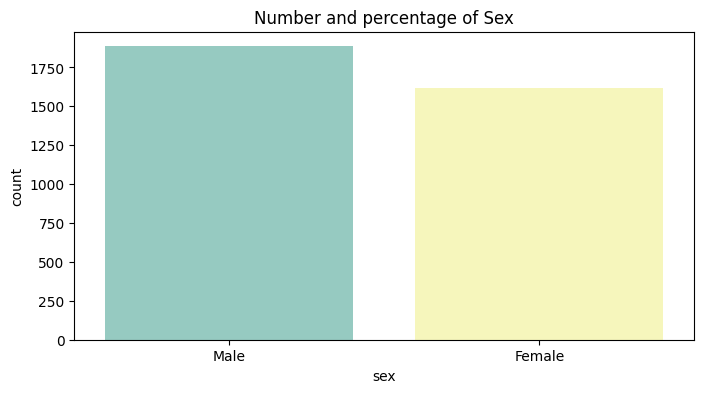

In [ ]:
plot_count("sex", "Sex", data_df, size=2)

In [ ]:
data_df["age"].value_counts().index[:20]

Int64Index([56, 60, 54, 62, 65, 64, 55, 59, 66, 63, 67, 57, 53, 58, 61, 45, 70,
            50, 52, 68],
           dtype='int64')

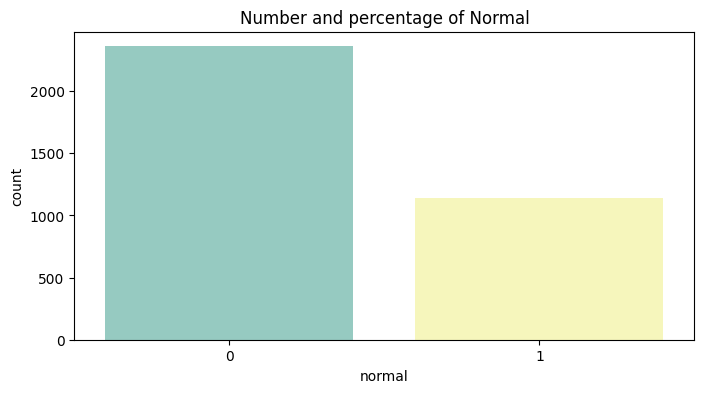

In [ ]:
plot_count("normal", "Normal", data_df, size=2)

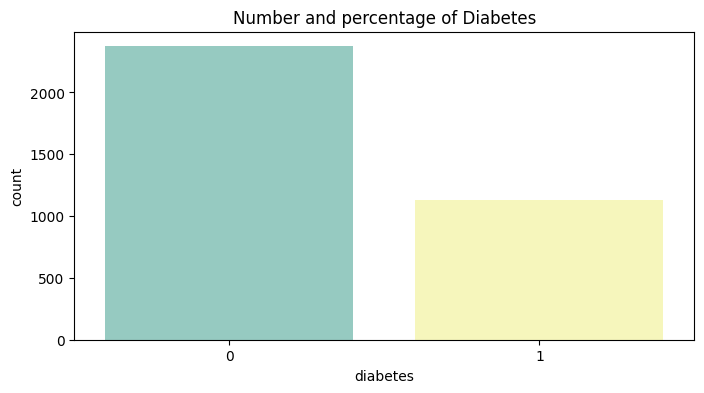

In [ ]:
plot_count("diabetes", "Diabetes", data_df, size=2)

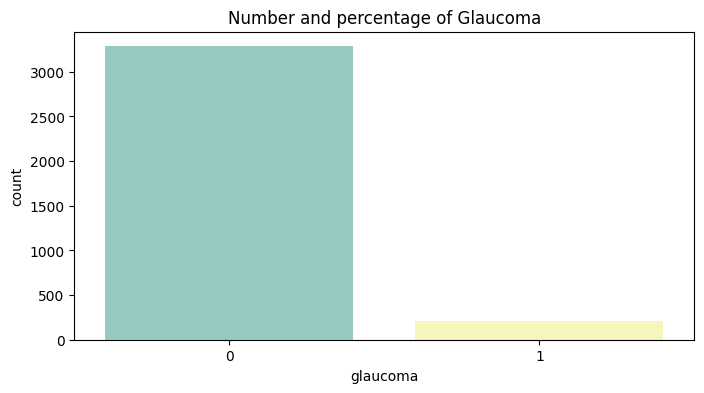

In [ ]:
plot_count("glaucoma", "Glaucoma", data_df, size=2)

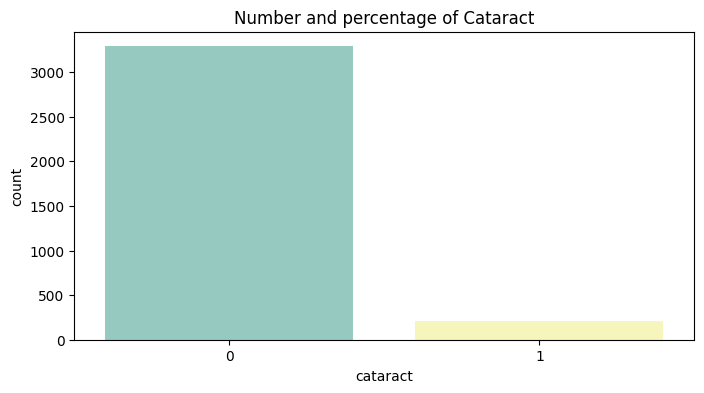

In [ ]:
plot_count("cataract", "Cataract", data_df, size=2)

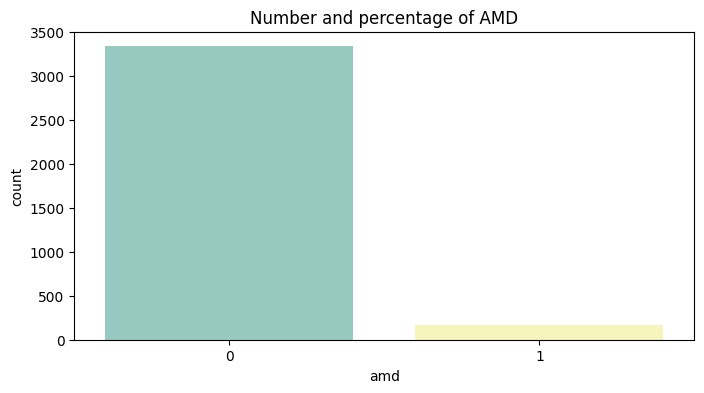

In [ ]:
plot_count("amd", "AMD", data_df, size=2)

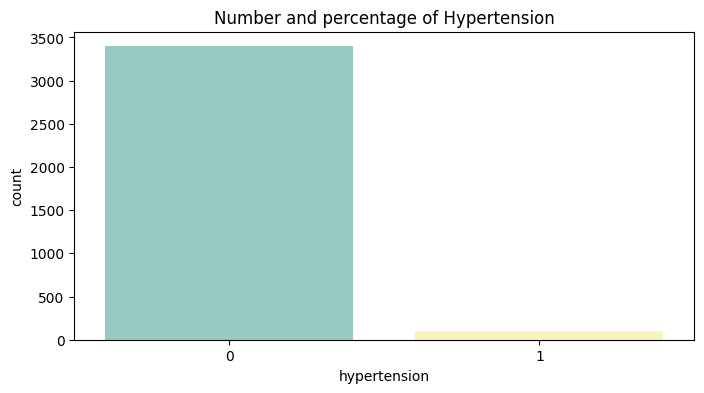

In [ ]:
plot_count("hypertension", "Hypertension", data_df, size=2)

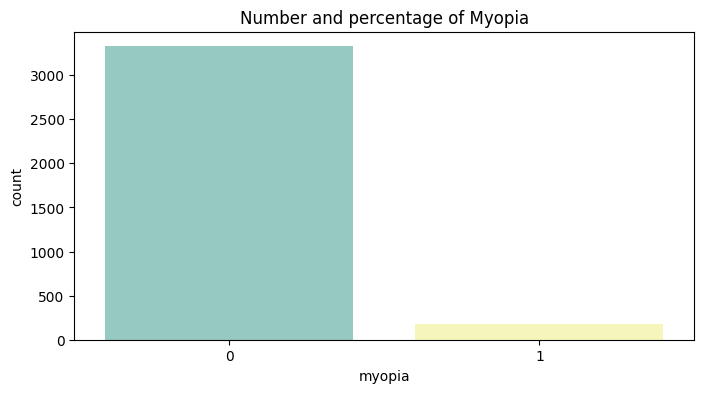

In [ ]:
plot_count("myopia", "Myopia", data_df, size=2)

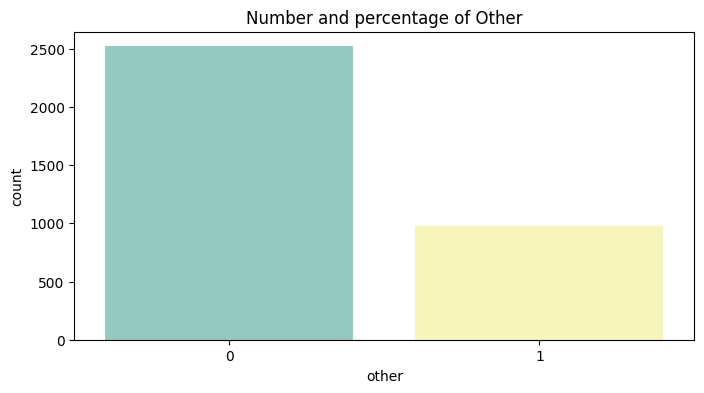

In [ ]:
plot_count("other", "Other", data_df, size=2)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


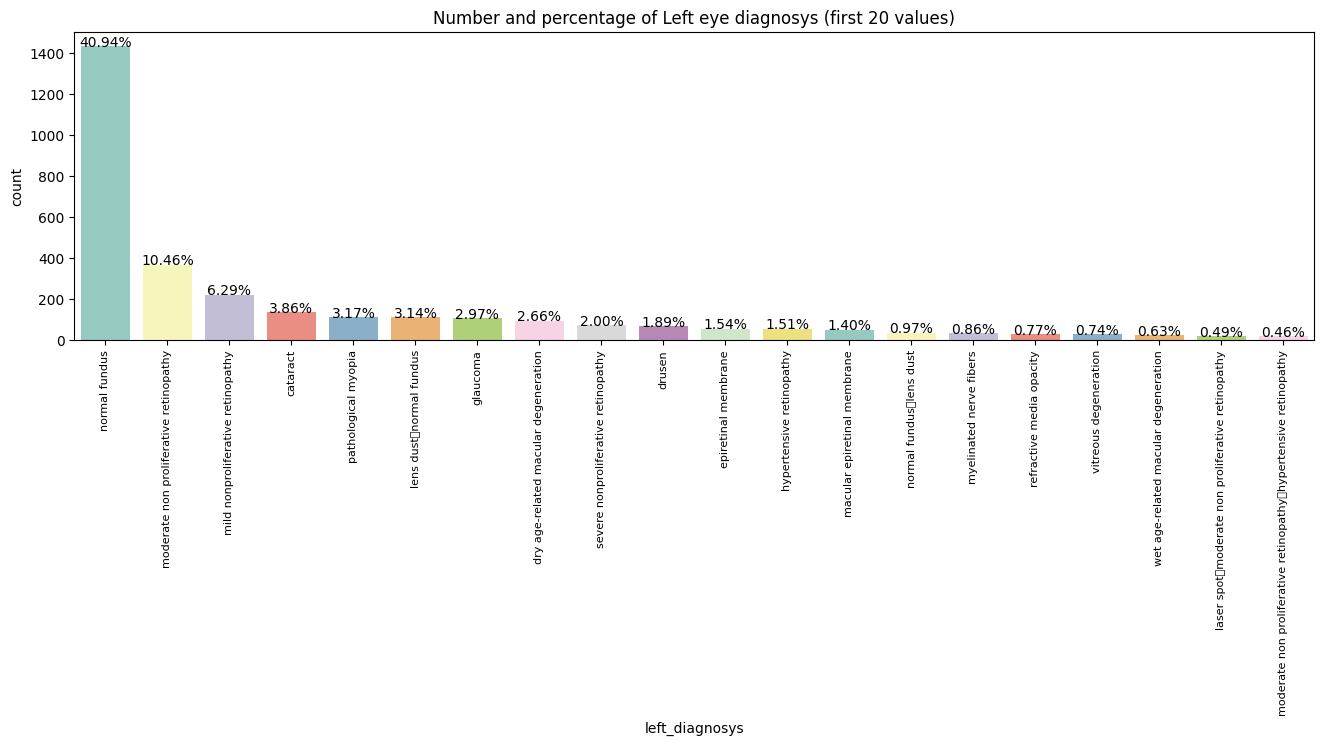

In [ ]:
plot_count("left_diagnosys", "Left eye diagnosys (first 20 values)", data_df, size=4)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


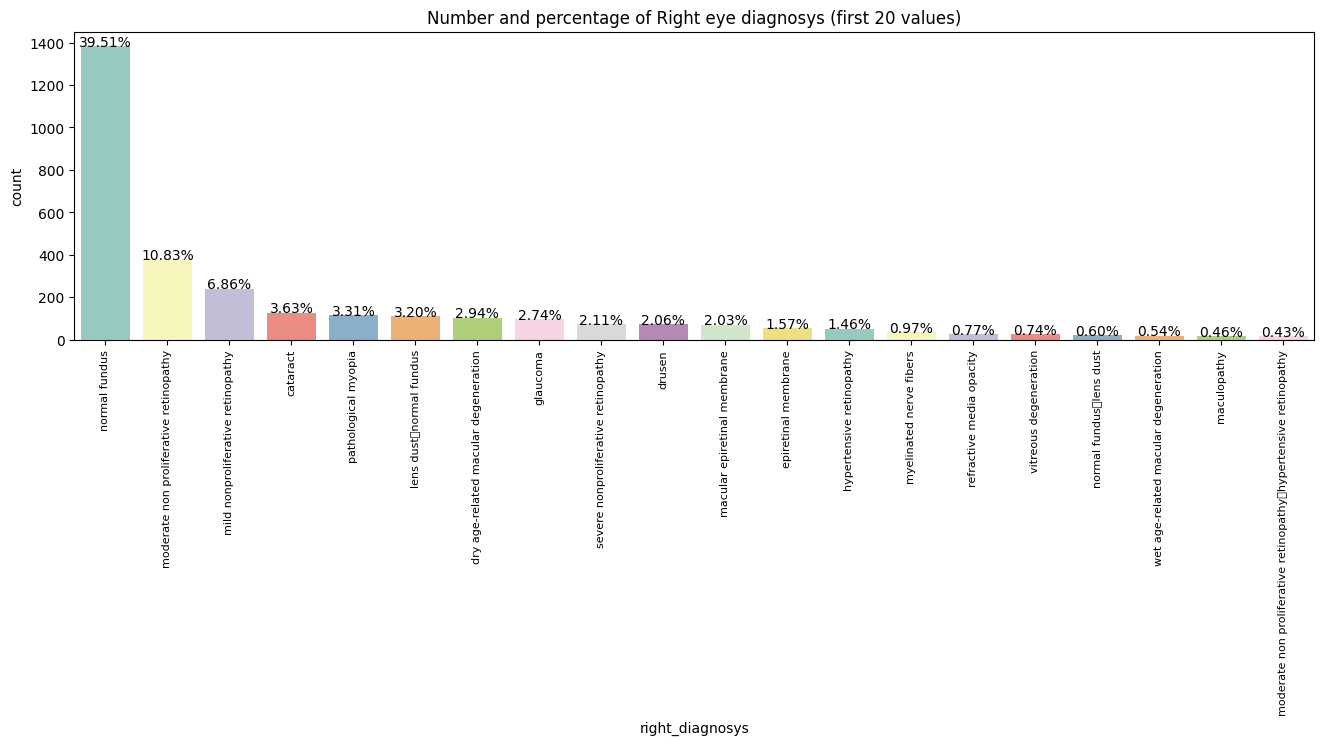

In [ ]:
plot_count("right_diagnosys", "Right eye diagnosys (first 20 values)", data_df, size=4)

In [ ]:
def plot_feature_distribution_grouped(feature, title, df, hue, size=4):
    plt.figure(figsize=(size*5,size*2))
    plt.title(title)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    g = sns.countplot(data=data_df, x=df[feature], hue=df[hue], palette='Set3')
    plt.xlabel(feature)
    plt.legend()
    plt.show()

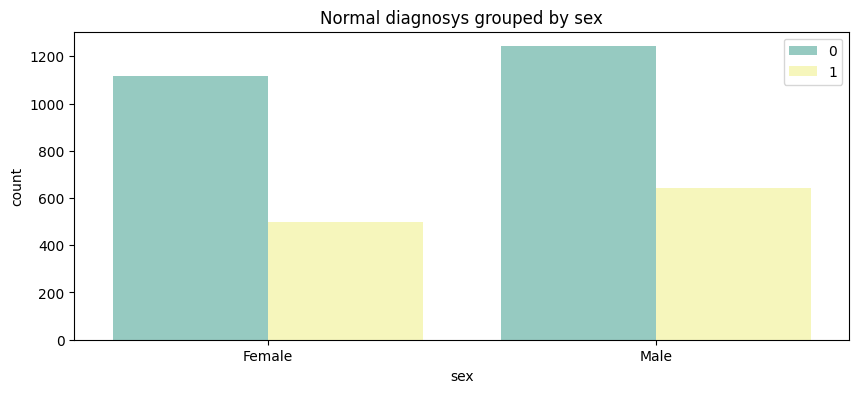

In [ ]:
plot_feature_distribution_grouped('sex', 'Normal diagnosys grouped by sex', data_df, 'normal', size=2)

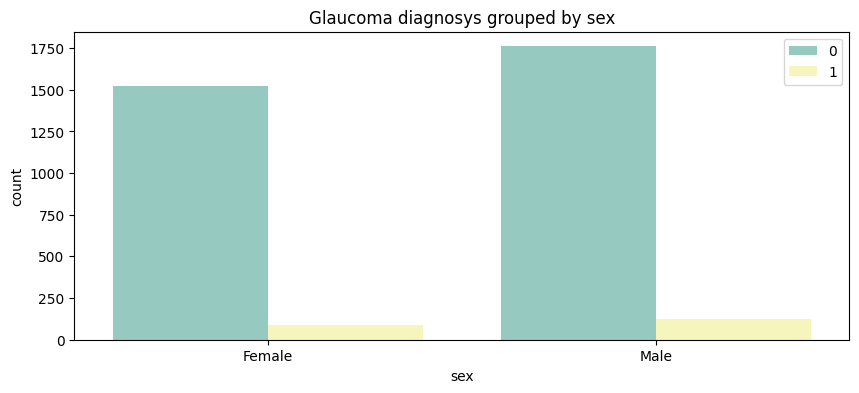

In [ ]:
plot_feature_distribution_grouped('sex', 'Glaucoma diagnosys grouped by sex', data_df, 'glaucoma', size=2)

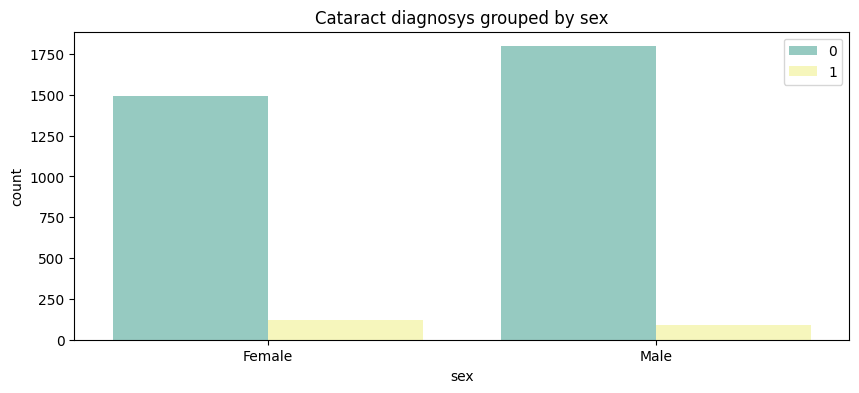

In [ ]:
plot_feature_distribution_grouped('sex', 'Cataract diagnosys grouped by sex', data_df, 'cataract', size=2)

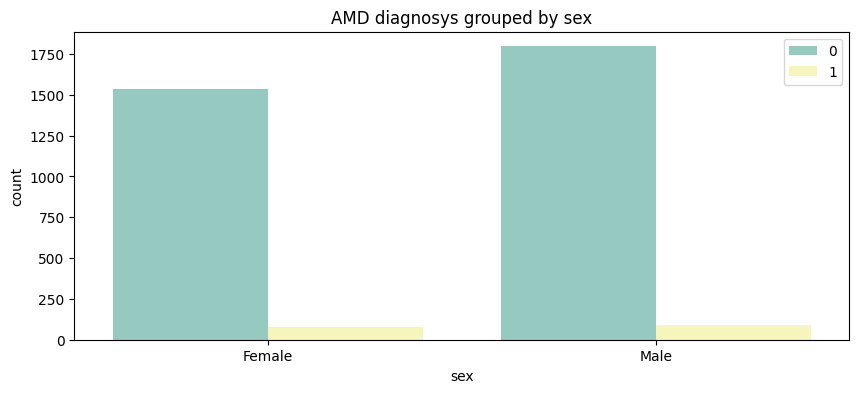

In [ ]:
plot_feature_distribution_grouped('sex', 'AMD diagnosys grouped by sex', data_df, 'amd', size=2)

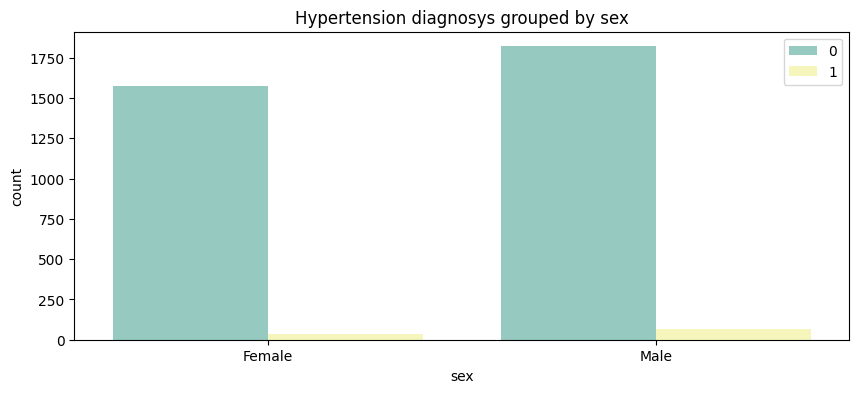

In [ ]:
plot_feature_distribution_grouped('sex', 'Hypertension diagnosys grouped by sex', data_df, 'hypertension', size=2)

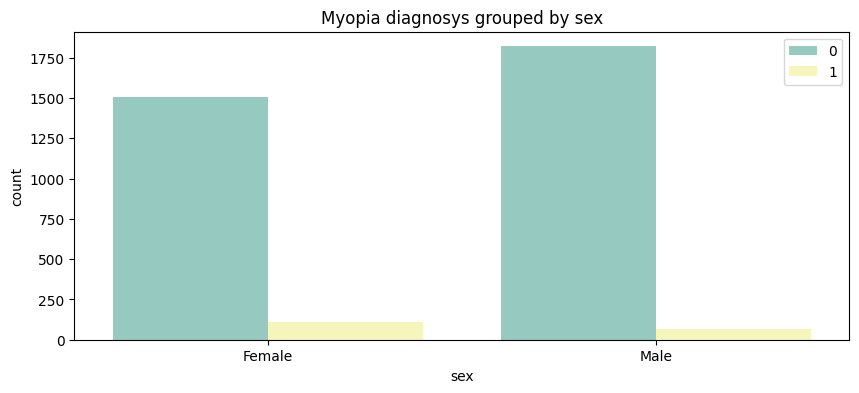

In [ ]:
plot_feature_distribution_grouped('sex', 'Myopia diagnosys grouped by sex', data_df, 'myopia', size=2)

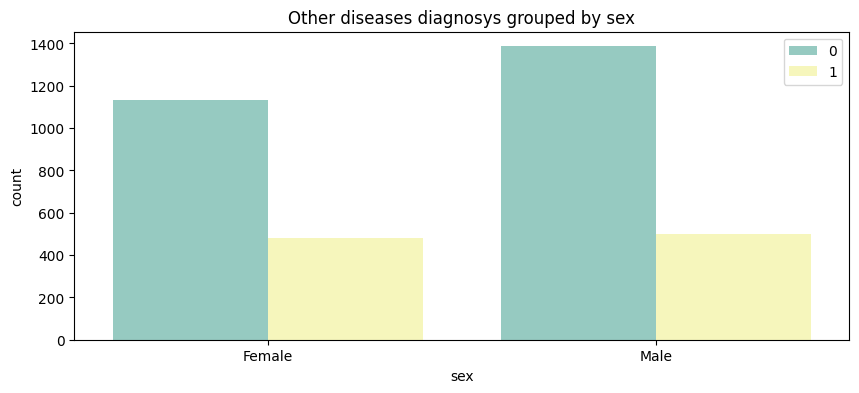

In [ ]:
plot_feature_distribution_grouped('sex', 'Other diseases diagnosys grouped by sex', data_df, 'other', size=2)

In [ ]:
import imageio
IMAGE_PATH = "//content//Dataset//ODIR-5K//ODIR-5K//Training Images"
def show_images(df, title="Diagnosys", eye_exam="left_fundus"):
    print(f"{title}; eye exam: {eye_exam}")
    f, ax = plt.subplots(3,3, figsize=(16,16))
    for i,idx in enumerate(df.index):
        dd = df.iloc[idx]
        image_name = dd[eye_exam]
        image_path = os.path.join(IMAGE_PATH, image_name)
        img_data=imageio.imread(image_path)
        ax[i//3, i%3].imshow(img_data)
        ax[i//3, i%3].axis('off')
    plt.show()

Left eye with cataract; eye exam: left_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


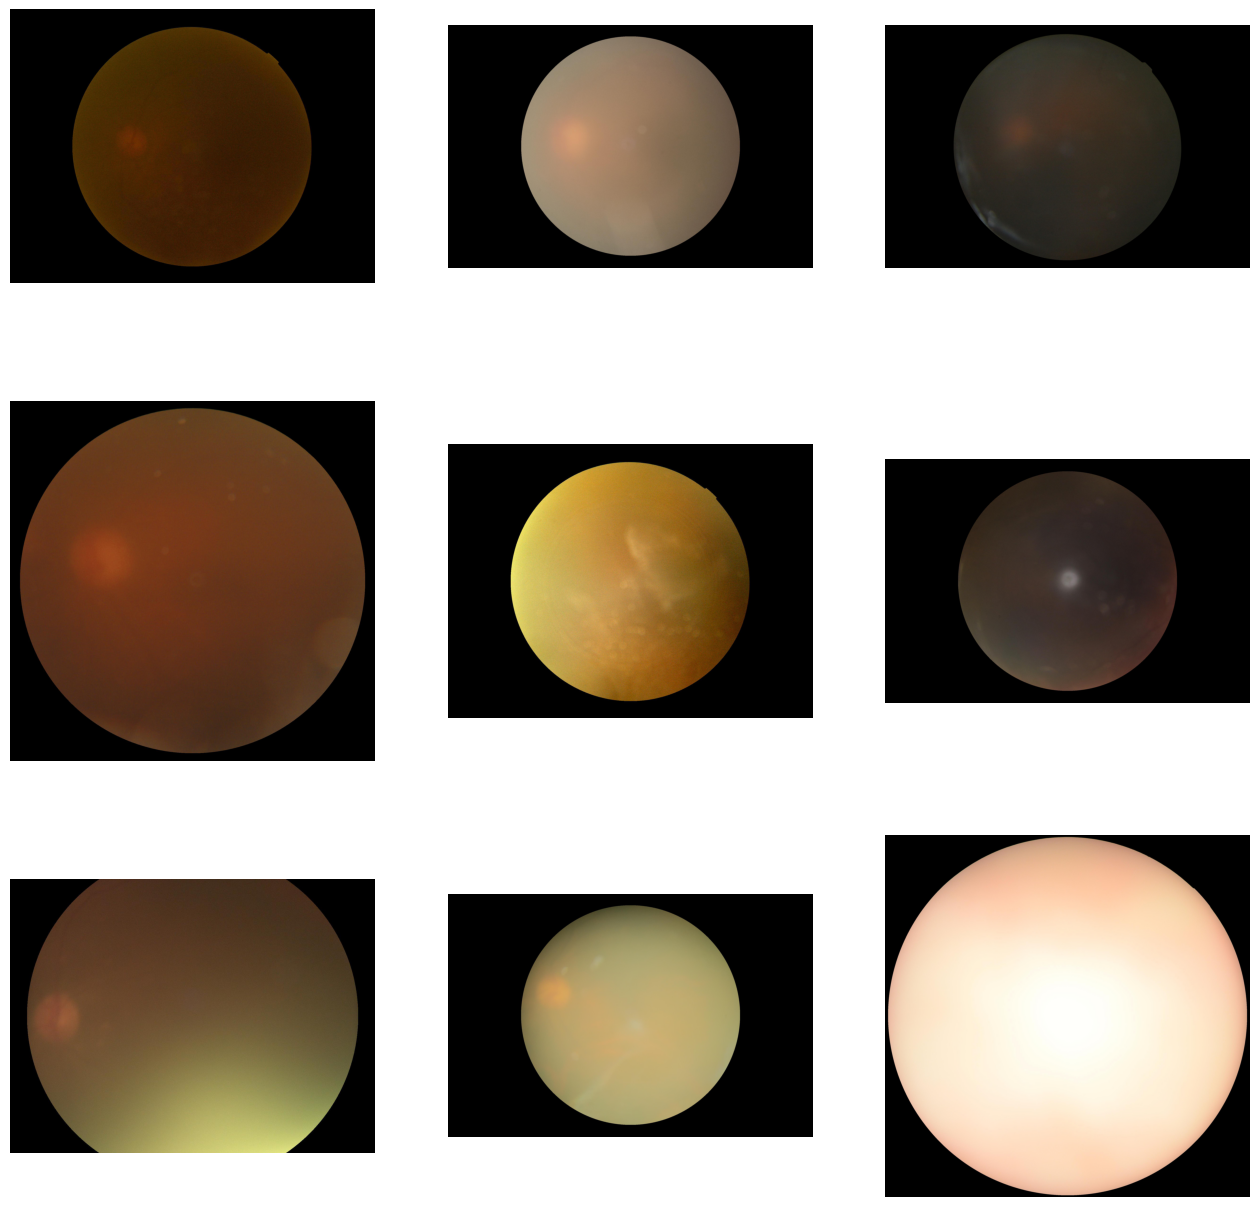

In [ ]:
df = data_df.loc[(data_df.cataract==1) & (data_df.left_diagnosys=="cataract")].sample(9).reset_index()
show_images(df,title="Left eye with cataract",eye_exam="left_fundus")

Right eye with cataract; eye exam: right_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


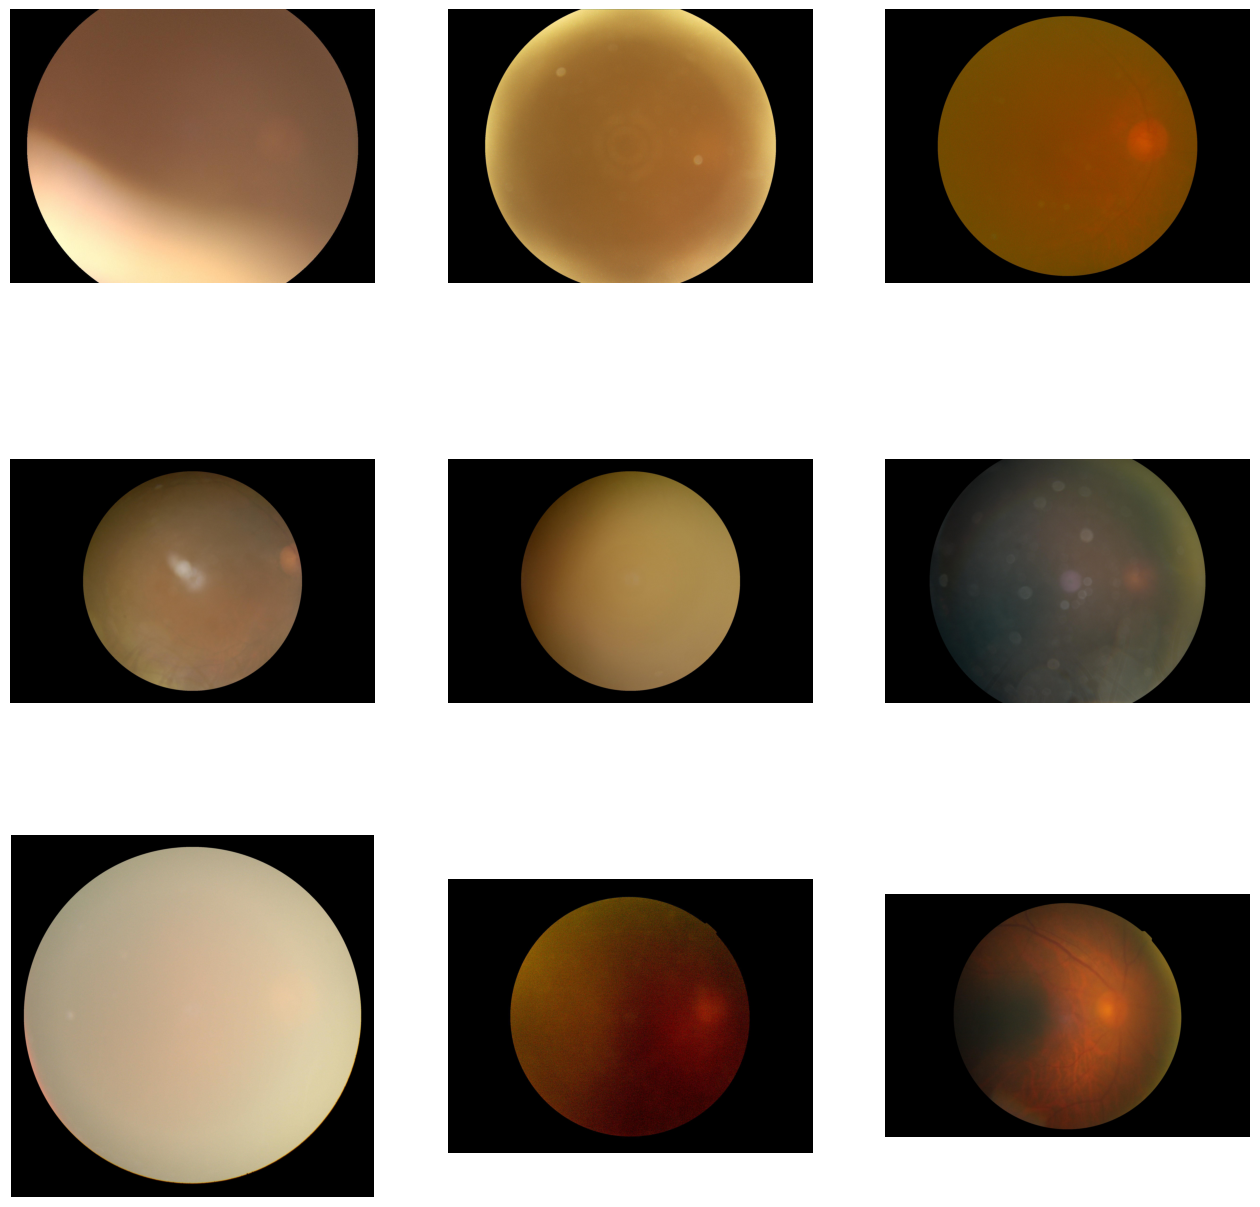

In [ ]:
df = data_df.loc[(data_df.cataract==1) & (data_df.right_diagnosys=="cataract")].sample(9).reset_index()
show_images(df,title="Right eye with cataract",eye_exam="right_fundus")

Left eye with glaucoma; eye exam: left_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


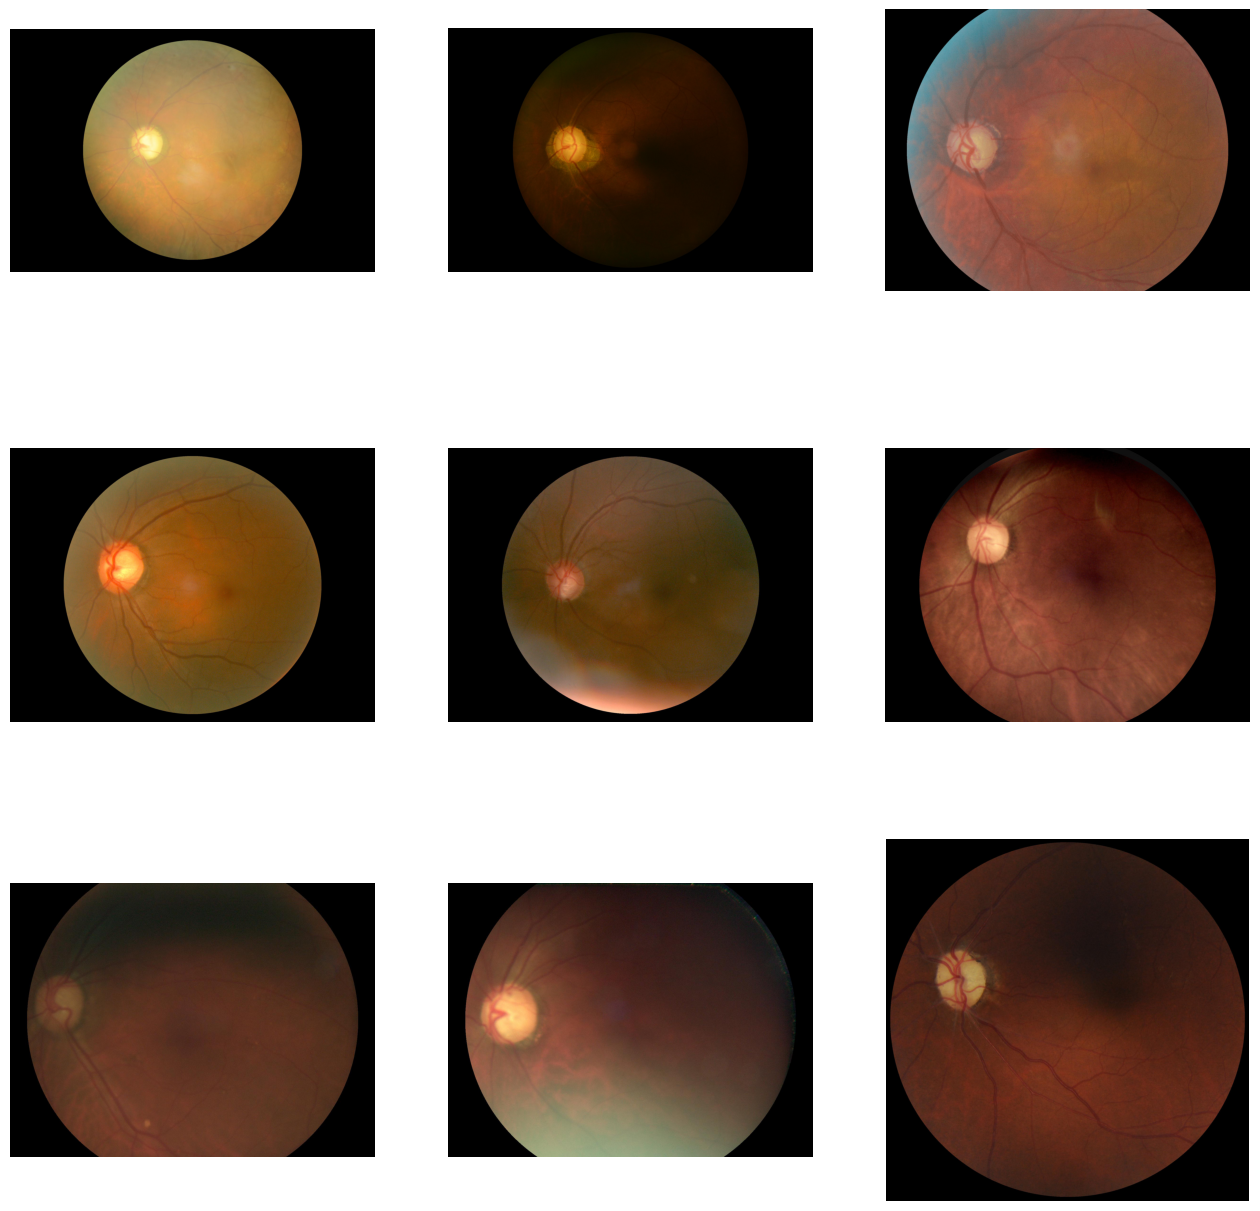

In [ ]:
df = data_df.loc[(data_df.glaucoma==1) & (data_df.left_diagnosys=="glaucoma")].sample(9).reset_index()
show_images(df,title="Left eye with glaucoma",eye_exam="left_fundus")

Right eye with glaucoma; eye exam: right_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


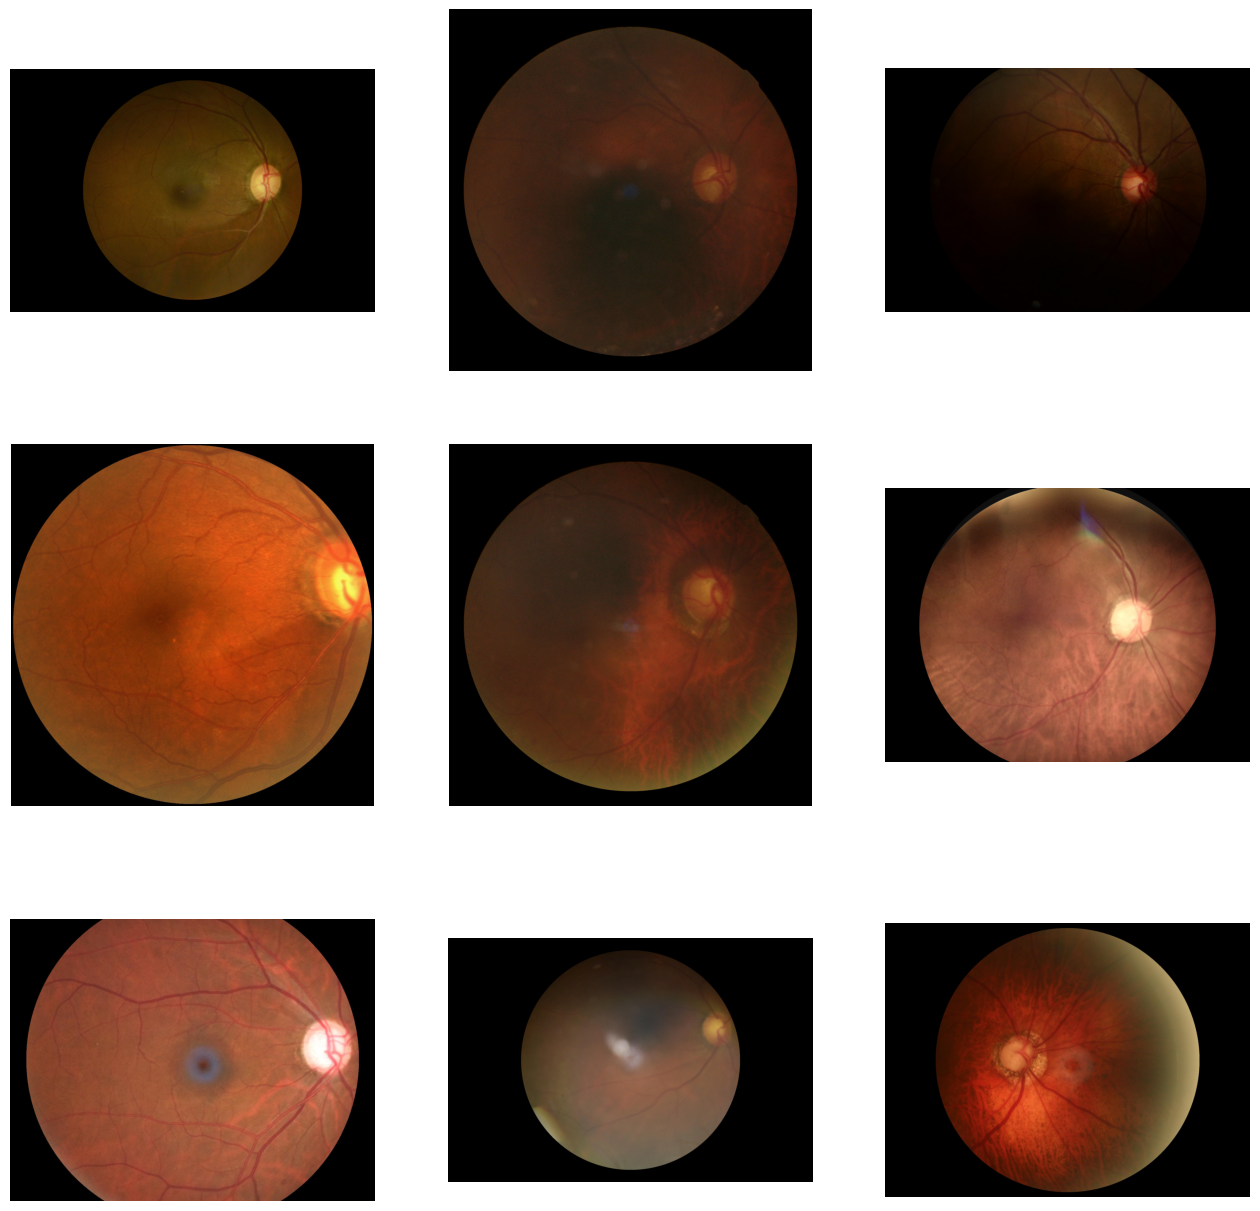

In [ ]:
df = data_df.loc[(data_df.glaucoma==1) & (data_df.right_diagnosys=="glaucoma")].sample(9).reset_index()
show_images(df,title="Right eye with glaucoma",eye_exam="right_fundus")

Left eye with myopia; eye exam: left_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


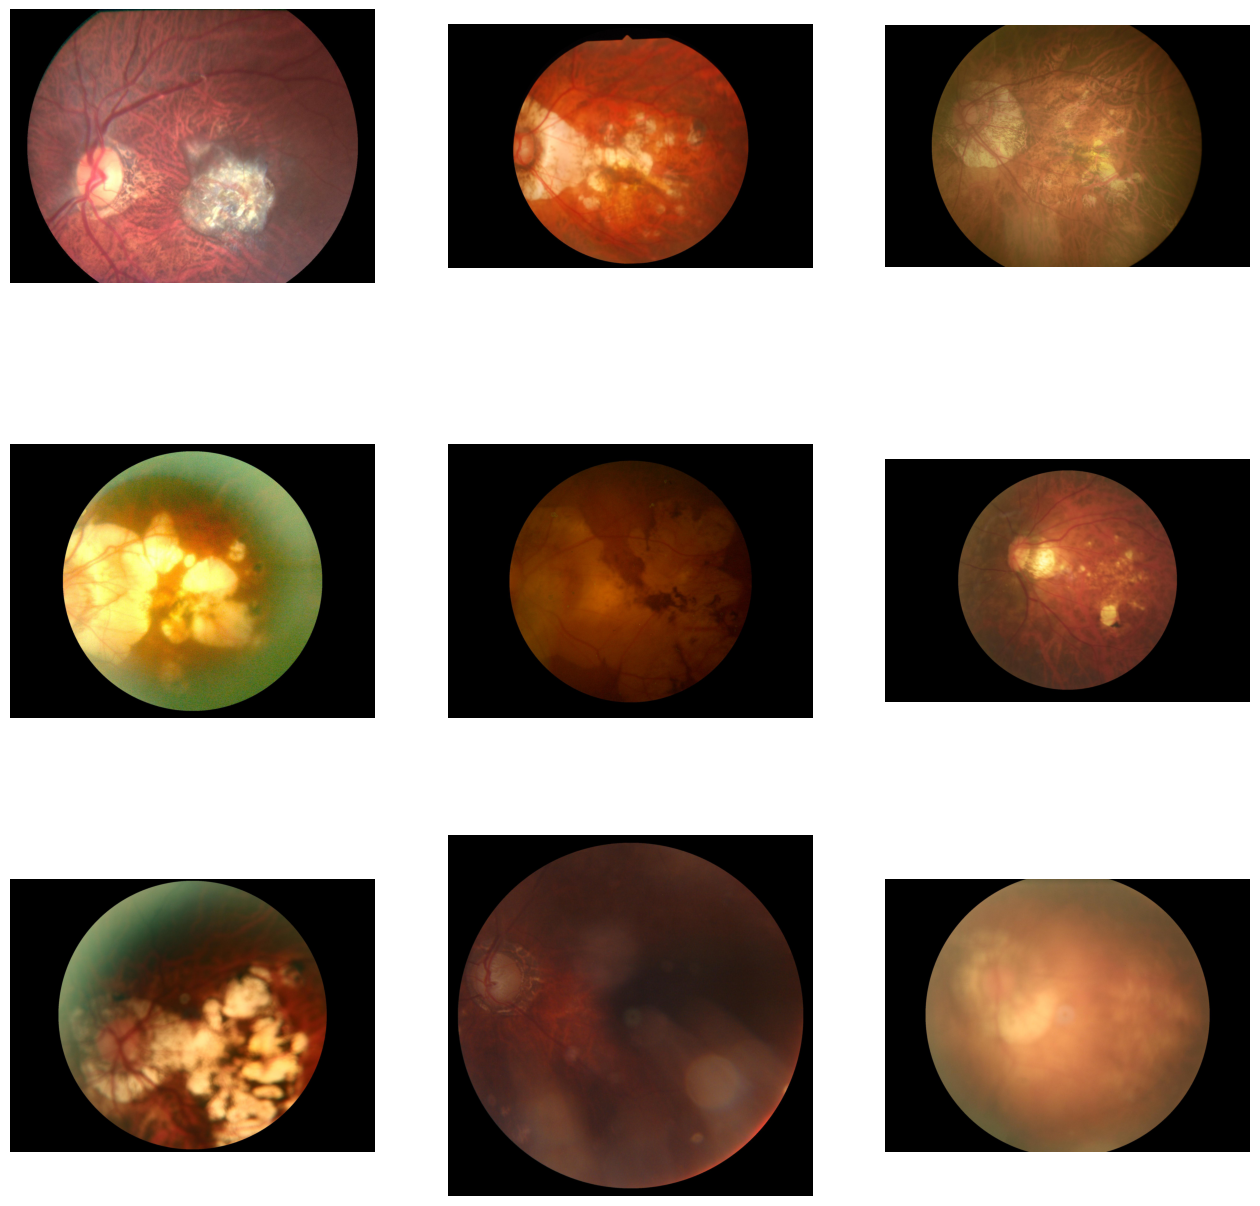

In [ ]:
df = data_df.loc[(data_df.myopia==1)].sample(9).reset_index()
show_images(df,title="Left eye with myopia",eye_exam="left_fundus")

Right eye with myopia; eye exam: right_fundus


<ipython-input-25-23776dce6a77>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_data=imageio.imread(image_path)


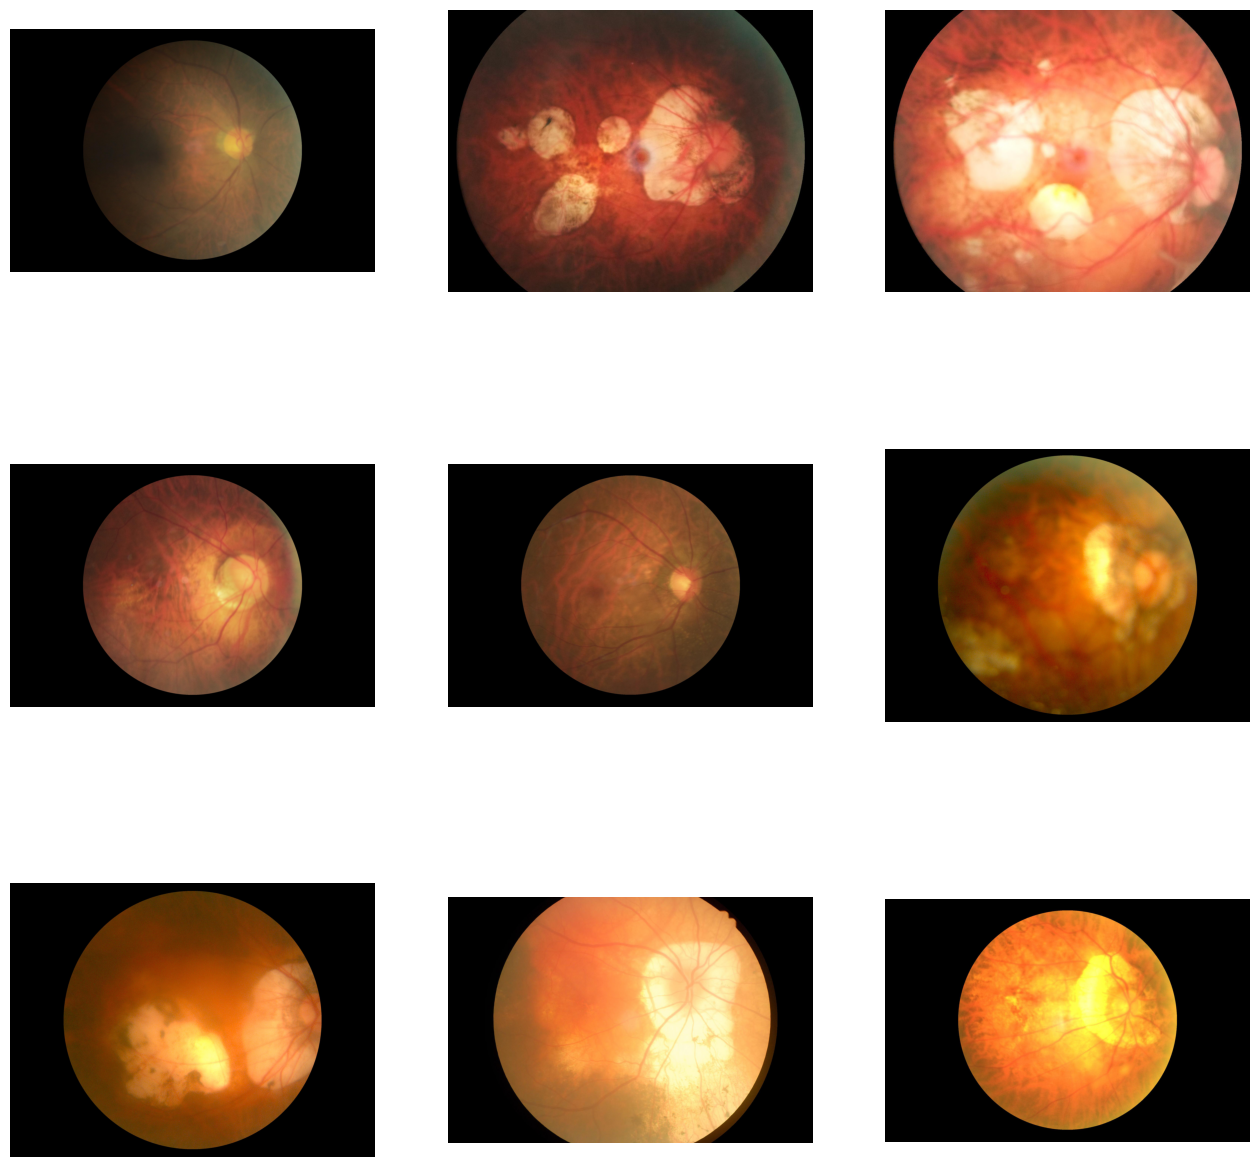

In [ ]:
df = data_df.loc[(data_df.myopia==1)].sample(9).reset_index()
show_images(df,title="Right eye with myopia",eye_exam="right_fundus")